# KC Exploratory Data Analysis (EDA)

This notebook houses the exploratory phase of the project with an emphasis on visual data and exploring the data to see whether or not the assumptions for linear regression are met.Remember that for this project the dependent variable is 'price' and specifically the price of homes in King County, Seattle or in other words the variable we are trying better understand and in the end, be able to predict the price of a home with an emphasis on homes within the IQR of the price range that a large portion of first time buyers might be interested i

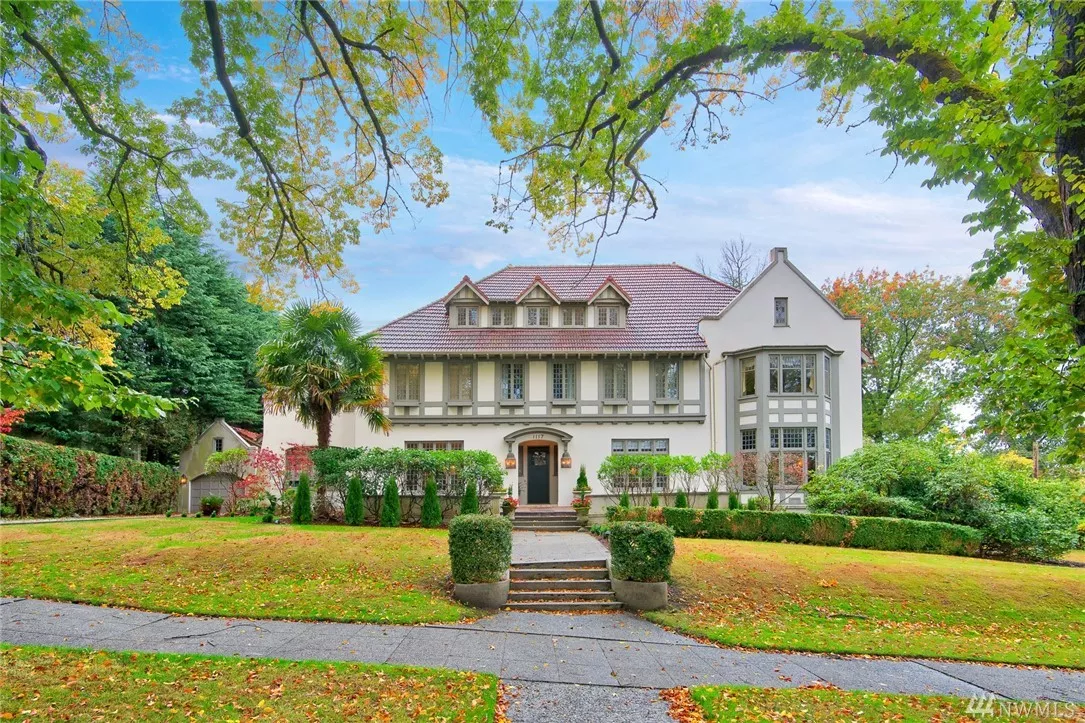

In [142]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from yellowbrick.features import Rank2D
import seaborn as sns
%matplotlib inline

In [178]:
# import data

kc_housing_full = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_full.csv')
c_house_properties_dropped = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_house_properties_dropped.csv')
kc_housing_most_common = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_most_common.csv')
kc_housing_mean = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_mean.csv')
kc_housing_median = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_median.csv')


In [179]:
#visually inspect data on import to make sure everything is correct
kc_house_properties_dropped.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [180]:
#pandas sometimes does not recognize the original index column and adds a new one under 'Unnamed'. Let's remove it before continuing. 

#kc_house_properties_dropped = kc_house_properties_dropped.drop(['Unnamed: 0'], axis=1)
#kc_housing_most_common = kc_housing_most_common.drop(['Unnamed: 0'], axis=1)
#kc_housing_mean = kc_housing_mean.drop(['Unnamed: 0'], axis=1)
#kc_housing_median = kc_housing_median.drop(['Unnamed: 0'], axis=1)
kc_housing_full = kc_housing_full.drop(['Unnamed: 0'], axis=1)

# Statistical assumptions for linear regression

### Linearity - relationship between dependent and independent variables should be linear. 
### Normaility - data should be normally distributed. 
### Multicollinearity - independent variable should not be highly correlated.

Each of the following visuals should be fairly similiar besides the 'kc_house_properties_dropped' dataframe. Nevertheless,
each dataframe will be checked to see if it meets each assumption. 

## Linearity and Multicollinearity

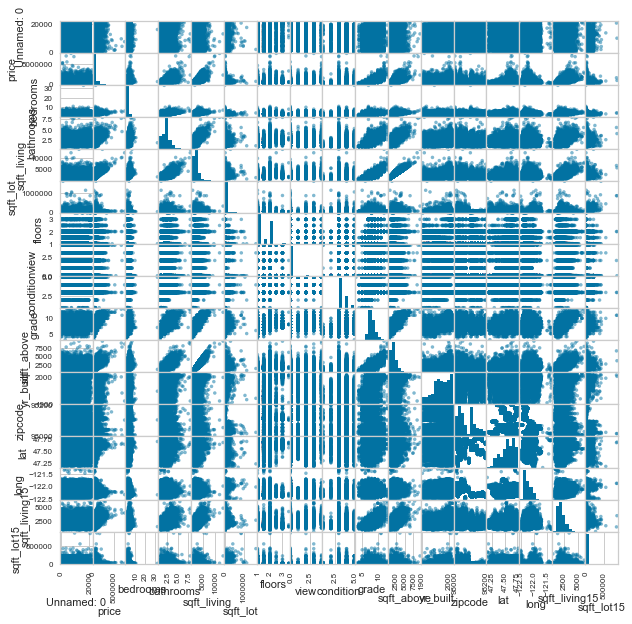

In [181]:
pd.plotting.scatter_matrix(kc_house_properties_dropped, figsize=[10, 10]);

In [ ]:
#pd.plotting.scatter_matrix(kc_housing_median, figsize=[10, 10]);
#pd.plotting.scatter_matrix(kc_housing_mean, figsize=[10, 10]);
#pd.plotting.scatter_matrix(kc_housing_most_common, figsize=[10, 10]);
pd.plotting.scatter_matrix(kc_housing_full, figsize=[10, 10]);

We can also look at collinearity by looking at numeric values only and applying a boolean statement if the relationship meets a set threshold, for example .7. 

In [184]:
#create correlation matrix for each dataframe 

#DomReg1418.set_index('Month').plot();.corr()
#kc_housing_most_common.corr()
#kc_housing_median.corr()
#kc_house_properties_dropped.corr()
kc_housing_full.corr()

,price,sqft_living,sqft_lot,sqft_above,yr_renovated,lat,long,sqft_living15,sqft_lot15,view_1.0,...,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015,bathrooms_1,bathrooms_2,bathrooms_3
price,1.000000,0.495975,0.080691,0.370017,0.053157,0.256841,-0.111209,0.411603,0.066190,0.089937,...,-0.013279,0.037300,0.019537,-0.014910,0.035812,0.219877,0.097712,-0.235722,0.098725,0.170411
sqft_living,0.495975,1.000000,0.282024,0.778370,-0.004145,-0.078823,0.149692,0.549054,0.045624,0.003779,...,-0.031491,0.051791,0.028775,0.039470,0.061249,0.177077,0.056873,-0.474661,0.241872,0.282580
sqft_lot,0.080691,0.282024,1.000000,0.229676,0.124376,-0.126389,0.108749,0.266594,0.342506,0.062339,...,-0.086852,-0.038033,-0.041902,0.024995,-0.048876,-0.021611,-0.030991,0.036999,-0.067565,0.048296
sqft_above,0.370017,0.778370,0.229676,1.000000,-0.066092,0.045900,0.178368,0.410527,-0.018847,-0.028763,...,-0.008030,0.008139,0.001838,0.030135,0.057214,0.150204,0.038778,-0.383879,0.215857,0.202071
yr_renovated,0.053157,-0.004145,0.124376,-0.066092,1.000000,0.014736,-0.038388,0.023960,0.092333,-0.009396,...,-0.033444,-0.018956,-0.016018,-0.016018,-0.017049,-0.041486,-0.012456,0.054822,-0.023887,-0.034770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yr_built_2014,0.219877,0.177077,-0.021611,0.150204,-0.041486,-0.048901,0.087764,0.129278,0.019945,0.006010,...,-0.090718,-0.051419,-0.043449,-0.043449,-0.046246,1.000000,-0.033788,-0.027329,0.063883,-0.051387
yr_built_2015,0.097712,0.056873,-0.030991,0.038778,-0.012456,0.003227,-0.038300,0.016341,0.026776,0.087591,...,-0.027238,-0.015439,-0.013046,-0.013046,-0.013886,-0.033788,1.000000,0.001821,0.014334,-0.021348
bathrooms_1,-0.235722,-0.474661,0.036999,-0.383879,0.054822,0.020964,-0.030526,-0.233940,0.054594,-0.004685,...,-0.059585,-0.041542,0.007731,-0.004844,-0.049943,-0.027329,0.001821,1.000000,-0.717330,-0.256674
bathrooms_2,0.098725,0.241872,-0.067565,0.215857,-0.023887,-0.063772,0.068614,0.115244,-0.034058,0.008069,...,0.043828,0.025963,-0.013277,0.020871,-0.020190,0.063883,0.014334,-0.717330,1.000000,-0.479093


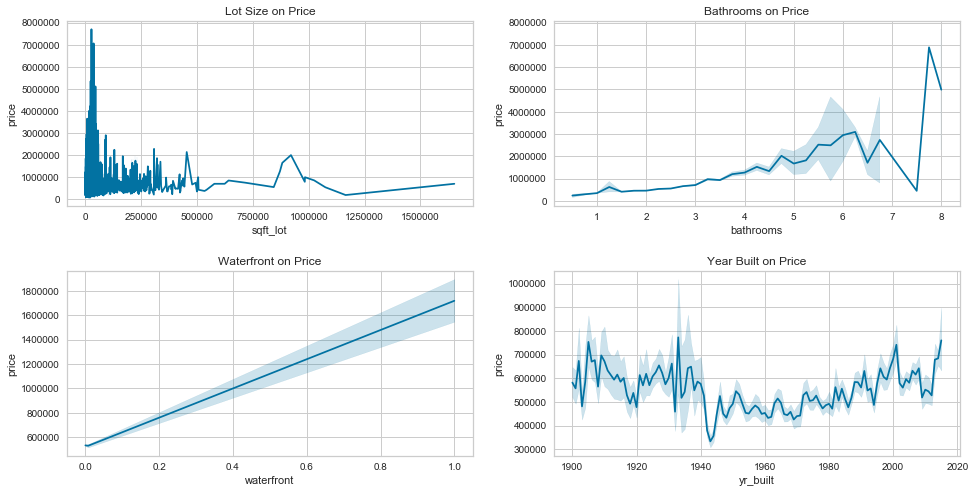

In [135]:
#plotting multiple lineplots to illustrate effect of variable on price. 

plt.figure(figsize=(16,8))

plt.subplot(221)
sns.lineplot(kc_housing_mean.sqft_lot, kc_housing_mean.price)
plt.title('Lot Size on Price')
plt.subplot(222)
sns.lineplot(kc_housing_mean.bathrooms, kc_housing_mean.price)
plt.title('Bathrooms on Price')
plt.subplot(223)
sns.lineplot(kc_housing_mean.waterfront, kc_housing_mean.price)
plt.title('Waterfront on Price')
plt.subplot(224)
sns.lineplot(kc_housing_mean.yr_built,kc_housing_mean.price)
plt.title('Year Built on Price')

plt.subplots_adjust(hspace=0.35)
plt.show()

Visually, it's clear that some variables correlate strongly with price. For example 'sqft_living15' and 'bathrooms'. Let's reduce our findings to the highest correlated variables using boolean statements.

In [186]:
# apply a boolean to a threshold of >.7
abs(kc_house_properties_dropped.corr() > 0.70)
#abs(kc_housing_mean.corr() > 0.70)
#abs(kc_housing_most_common.corr() > 0.70)
#abs(kc_housing_median.corr() > 0.70)
3abs(kc_housing_full.corr() > 0.70)

,price,sqft_living,sqft_lot,sqft_above,yr_renovated,lat,long,sqft_living15,sqft_lot15,view_1.0,...,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015,bathrooms_1,bathrooms_2,bathrooms_3
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yr_built_2014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
yr_built_2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
bathrooms_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
bathrooms_2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [187]:
# let's narrow our search for variables with high correlation but this time on the entire dataset 

df = kc_house_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758


looks like we have a handful of highly correlated variables. Let's drop the column with the highest correlated variables. 

In [190]:
#dropping 'sqft_above'

#kc_house_properties_dropped = kc_house_properties_dropped.drop(['sqft_above'], axis=1)
#kc_housing_most_common = kc_housing_most_common.drop(['sqft_above'], axis=1)
#kc_housing_mean = kc_housing_mean.drop(['sqft_above'], axis=1)
#kc_housing_median = kc_housing_median.drop(['sqft_above'], axis=1)
#kc_housing_full = kc_housing_full.drop(['sqft_above'], axis=1)

Our check for collinearity is complete, let's move to normality and scaling our data. 

## Normality

Let's check our data by looking at the distributions. 

In [44]:
x_cols = ['price','bedrooms','bathrooms','sqft_lot','floors','view','condition','sqft_basement','yr_built','zipcode','lat','long','sqft_living15','sqft_lot15']

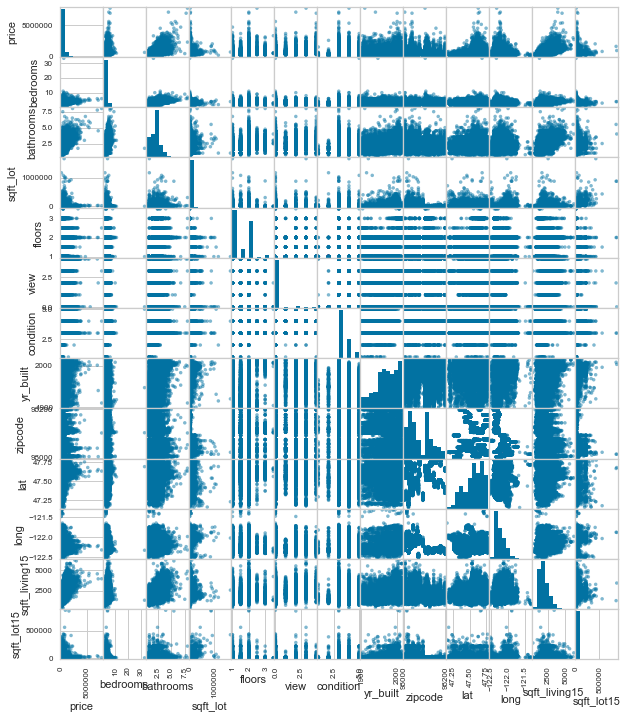

In [45]:
#plotting all features
#pd.plotting.scatter_matrix(kc_house_properties_dropped[x_cols], figsize=(10,12));
#pd.plotting.scatter_matrix(kc_housing_most_common[x_cols], figsize=(10,12));
#pd.plotting.scatter_matrix(kc_housing_mean[x_cols], figsize=(10,12));
#pd.plotting.scatter_matrix(kc_housing_median[x_cols], figsize=(10,12));

 As mentioned, regression models perform better on normaly distributed data. There are many ways to understand the structure of our data and Quantile-Quantile Plots (QQ Plots) help us do just that. 

Learn about QQ Plots here: https://data.library.virginia.edu/understanding-q-q-plots/

In [194]:
import scipy.stats as stats
from scipy.stats import shapiro
import math
from statsmodels.graphics.gofplots import qqplot

Text(0.5, 1.0, 'QQplot - price')

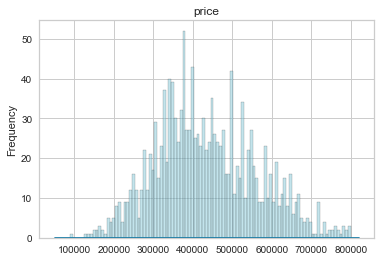

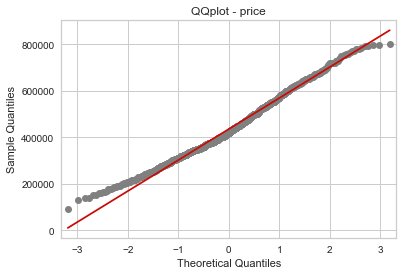

In [196]:
#QQ plot for 'price' and 'sqft_living15' 

stat, p = shapiro(kc_housing_full['price'])


kc_housing_full['price'].plot.hist(alpha=0.5, bins=100,color = 'c', edgecolor='black')
mu = kc_housing_full['price'].mean()
variance = kc_housing_full['price'].var()
sigma = math.sqrt(variance)
x = np.linspace(mu- 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x,mu, sigma))
plt.title('price')
qqplot(kc_housing_full['price'], line='q', color ='gray')
plt.title('QQplot - price')


Text(0.5, 1.0, 'QQplot - sqft_lot')

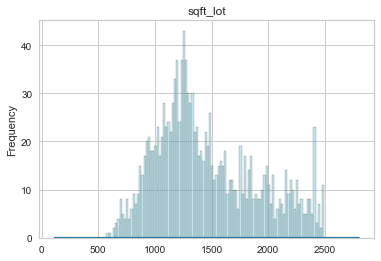

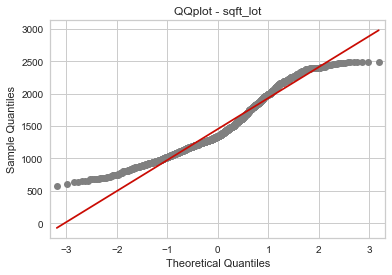

In [202]:
#QQ plot for 'price' and 'sqft_living15' 

stat, p = shapiro(kc_housing_full['sqft_lot'])


kc_housing_full['sqft_lot'].plot.hist(alpha=0.5, bins=100,color = 'c', edgecolor='black')
mu = kc_housing_full['sqft_lot'].mean()
variance = kc_housing_full['sqft_lot'].var()
sigma = math.sqrt(variance)
x = np.linspace(mu- 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x,mu, sigma))
plt.title('sqft_lot')
qqplot(kc_housing_full['sqft_lot'], line='q', color ='gray')
plt.title('QQplot - sqft_lot')

From our graphic above we see not all (if any) of our data follows a normal distribution, in order to develop a better model it is good practice to attempt to transform the data so that it follows a normal distribution before modeling. Let's apply a log transform to correct this and make the data more normal. 

Text(0.5, 1.0, 'log_sqft_living15')

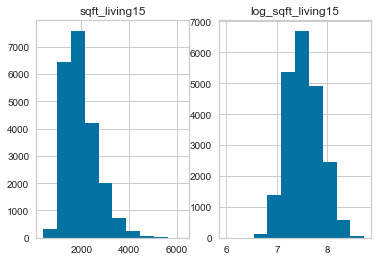

In [192]:
# take a look at the effect of log transform on the data. Using the variable 'sqft_living15' as an example

f, ax = plt.subplots(1,2)
ax[0].hist(kc_house_properties_dropped.sqft_living15)
ax[0].set_title('sqft_living15')
ax[1].hist(np.log(kc_house_properties_dropped.sqft_living15))
ax[1].set_title('log_sqft_living15')

Great! looks like our log transform was able to make our data slightly more normal which will help us in the long run to make a better model. Let's do this for each dataframe.

In [86]:
# add engineered values into each dataframe and check to see if they have been added

kc_house_properties_dropped['log_sqft_living15'] = np.log(kc_house_properties_dropped.sqft_living15)
#kc_house_properties_dropped['log_sqft_lot'] = np.log(kc_house_properties_dropped.sqft_lot)
kc_house_properties_dropped['log_price'] = np.log(kc_house_properties_dropped.price)

kc_house_properties_dropped.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft_living15,log_sqft_lot,log_sqft_basement,log_price
0,221900.0,3,1.00,5650,1.0,0.0,3,0.0,1955,98178,47.5112,-122.257,1340,5650,7.200425,8.639411,12.309982,12.309982
1,538000.0,3,2.25,7242,2.0,0.0,3,400.0,1951,98125,47.7210,-122.319,1690,7639,7.432484,8.887653,13.195614,13.195614
2,180000.0,2,1.00,10000,1.0,0.0,3,0.0,1933,98028,47.7379,-122.233,2720,8062,7.908387,9.210340,12.100712,12.100712
3,604000.0,4,3.00,5000,1.0,0.0,5,910.0,1965,98136,47.5208,-122.393,1360,5000,7.215240,8.517193,13.311329,13.311329
4,510000.0,3,2.00,8080,1.0,0.0,3,0.0,1987,98074,47.6168,-122.045,1800,7503,7.495542,8.997147,13.142166,13.142166


In [205]:
#kc_housing_most_common  

#kc_housing_most_common['log_sqft_living15'] = np.log(kc_house_properties_dropped.sqft_living15)
#kc_housing_most_common['log_sqft_lot'] = np.log(kc_house_properties_dropped.sqft_lot)
#kc_housing_most_common['log_price'] = np.log(kc_house_properties_dropped.price)

#kc_housing_most_common.head()

In [208]:
#kc_housing_mean 

#kc_housing_mean['log_sqft_living15'] = np.log(kc_house_properties_dropped.sqft_living15)
#kc_housing_mean['log_sqft_lot'] = np.log(kc_house_properties_dropped.sqft_lot)
#kc_housing_mean['log_price'] = np.log(kc_house_properties_dropped.price)

#kc_housing_mean.head()

In [211]:
#kc_housing_median 

#kc_housing_median['log_sqft_living15'] = np.log(kc_house_properties_dropped.sqft_living15)
#kc_housing_median['log_sqft_lot'] = np.log(kc_house_properties_dropped.sqft_lot)
#kc_housing_median['log_price'] = np.log(kc_house_properties_dropped.price)

#kc_housing_median .head()

In [226]:
#kc_housing_full

#kc_housing_full['log_sqft_living15'] = np.log(kc_housing_full.sqft_living15)
#kc_housing_full['log_sqft_lot'] = np.log(kc_housing_full.sqft_lot)
kc_housing_full['log_price'] = np.log(kc_housing_full.price)


### Feature Scaling

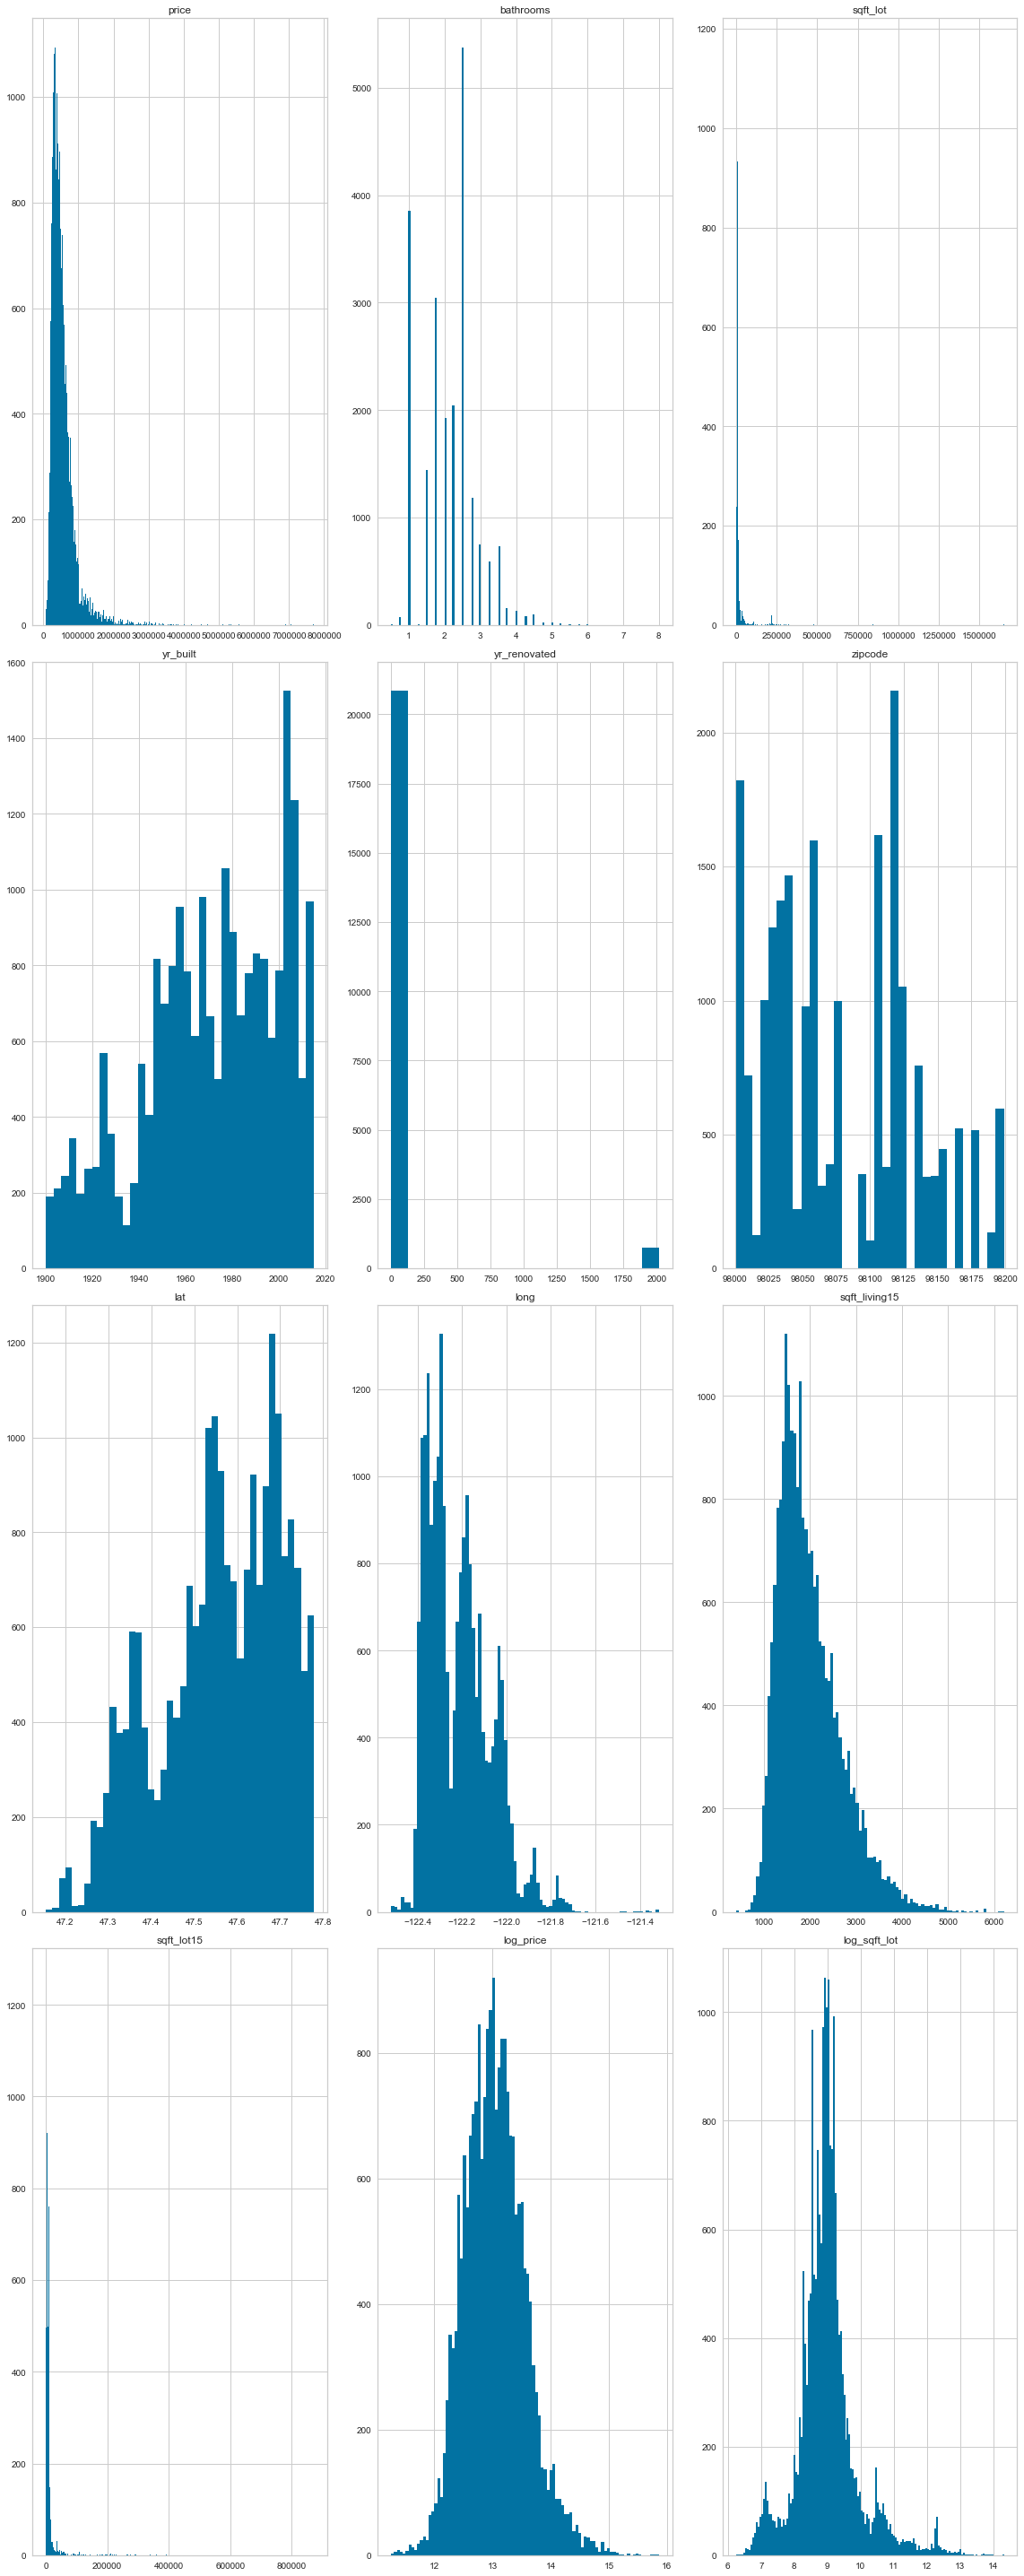

In [97]:
#search for only continous data using the kc_housing_mean as an example

cont_data = kc_housing_mean.loc[:, ((kc_housing_mean.dtypes != 'object') & (kc_housing_mean.nunique() > 20))]

fig, axes = plt.subplots(nrows=(cont_data.shape[1] // 3), ncols=3, figsize=(16,40))

categoricals = [column for column in cont_data.columns if column != 'Id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(kc_housing_mean[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

Ok, now we have narrowed down our candidates for scaling. Let's scale the values using min-max scaling to get our values between 0 and 1 on the non-engineered data. 

In [220]:
# scale each feature for each dataframe and then add them. 

sqft_living_dropped = kc_house_properties_dropped['sqft_living']
sqftliving15_dropped = kc_house_properties_dropped['sqft_living15']
price_dropped = kc_house_properties_dropped['price']
sqft_lot_dropped = kc_house_properties_dropped ['sqft_lot']

kc_house_properties_dropped['sqft_lot'] = (sqft_lot_dropped - min(sqft_lot_dropped)) / (max(sqft_lot_dropped) - min(sqft_lot_dropped))
kc_house_properties_dropped['sqft_living15'] = (sqftliving15_dropped - min(sqftliving15_dropped)) / (max(sqftliving15_dropped) - min(sqftliving15_dropped))
kc_house_properties_dropped['price'] = (price_dropped - min(price_dropped)) / (max(price_dropped) - min(price_dropped))
kc_house_properties_dropped['sqft_living'] = (sqft_living_dropped - min(sqft_living_dropped)) / max(sqft_living_dropped - min(sqft_living_dropped))

In [250]:
sqft_living_mean = kc_housing_mean['sqft_living']
sqftliving15_mean = kc_housing_mean['sqft_living15']
price_mean = kc_housing_mean['price']
sqft_lot_mean = kc_housing_mean['sqft_lot']

kc_housing_mean['sqft_lot'] = (sqft_lot_mean - min(sqft_lot_mean)) / (max(sqft_lot_mean) - min(sqft_lot_mean))
kc_housing_mean['sqft_living15'] = (sqftliving15_mean - min(sqftliving15_mean)) / (max(sqftliving15_mean) - min(sqftliving15_mean))
kc_housing_mean['price'] = (price_mean - min(price_mean)) / (max(price_mean) - min(price_mean))
kc_housing_mean['sqft_living'] = (sqft_living_mean - min(sqft_living_mean)) / max(sqft_living_mean) - min(sqft_living_mean)

In [227]:
sqft_living_median = kc_housing_median['sqft_living']
sqftliving15_median = kc_housing_median['sqft_living15']
price_median = kc_housing_median['price']
sqft_lot_median = kc_housing_median['sqft_lot']

kc_housing_median['sqft_lot'] = (sqft_lot_median - min(sqft_lot_median)) / (max(sqft_lot_median) - min(sqft_lot_median))
kc_housing_median['sqft_living15'] = (sqftliving15_median - min(sqftliving15_median)) / (max(sqftliving15_median) - min(sqftliving15_median))
kc_housing_median['price'] = (price_median - min(price_median)) / (max(price_median) - min(price_median))
kc_housing_median['sqft_living'] = (sqft_living_median - min(sqft_living_median)) / max(sqft_living_median - min(sqft_living_median))

In [228]:
sqft_living_full = kc_housing_full['sqft_living']
sqftliving15_full = kc_housing_full['sqft_living15']
price_full =kc_housing_full['price']
sqft_lot_full = kc_housing_full['sqft_lot']

kc_housing_full['sqft_lot'] = (sqft_lot_full - min(sqft_lot_full)) / (max(sqft_lot_full) - min(sqft_lot_full))
kc_housing_full['sqft_living15'] = (sqftliving15_full - min(sqftliving15_full)) / (max(sqftliving15_full) - min(sqftliving15_full))
kc_housing_full['price'] = (price_full - min(price_full)) / (max(price_full) - min(price_full))
kc_housing_full['sqft_living'] = (sqft_living_full - min(sqft_living_full)) / max(sqft_living_full - min(sqft_living_full))

In [229]:
sqft_living_common = kc_housing_most_common['sqft_living']
sqftliving15_common = kc_housing_most_common['sqft_living15']
price_common = kc_housing_most_common['price']
sqft_lot_common = kc_housing_most_common['sqft_lot']

kc_housing_most_common['sqft_lot'] = (sqft_lot_common - min(sqft_lot_common)) / (max(sqft_lot_common) - min(sqft_lot_common))
kc_housing_most_common['sqft_living15'] = (sqftliving15_common - min(sqftliving15_common)) / (max(sqftliving15_common) - min(sqftliving15_common))
kc_housing_most_common['price'] = (price_common - min(price_common)) / (max(price_common) - min(price_common))
kc_housing_most_common['sqft_living'] = (sqft_living_common - min(sqft_living_common)) / max(sqft_living_common - min(sqft_living_common))

In [244]:
kc_housing_full.shape

(1394, 171)

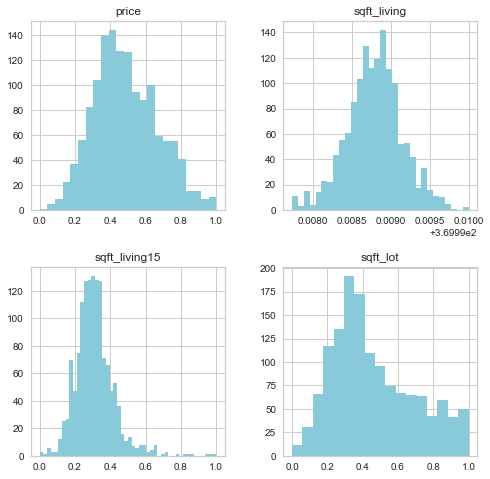

In [241]:
# After scaling
continuous_non_0 = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot']

kc_cont_non_0 = kc_housing_mean[continuous_non_0] 
kc_cont_non_0.hist(figsize  = [8, 8], bins='auto', color = 'c');

All our normalization should be complete at this point, let's take a look at the kc_house_properties_dropped dataframe as 
an example. 

In [230]:
kc_house_properties_dropped.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0.018880,3,1.00,0.061503,0.003108,1.0,0.0,3,7,0.0,1955,98178,47.5112,-122.257,0.161934,5650
1,1,0.060352,3,2.25,0.167046,0.004072,2.0,0.0,3,7,400.0,1951,98125,47.7210,-122.319,0.222165,7639
2,2,0.013382,2,1.00,0.030372,0.005743,1.0,0.0,3,6,0.0,1933,98028,47.7379,-122.233,0.399415,8062
3,3,0.069011,4,3.00,0.120729,0.002714,1.0,0.0,5,7,910.0,1965,98136,47.5208,-122.393,0.165376,5000
4,4,0.056678,3,2.00,0.099468,0.004579,1.0,0.0,3,8,0.0,1987,98074,47.6168,-122.045,0.241094,7503


In [236]:
#kc_house_properties_dropped = kc_house_properties_dropped.drop(['Unnamed: 0'], axis=1)
#kc_housing_most_common = kc_housing_most_common.drop(['Unnamed: 0'], axis=1)
#kc_housing_mean = kc_housing_mean.drop(['Unnamed: 0'], axis=1)
#kc_housing_median = kc_housing_median.drop(['Unnamed: 0'], axis=1)
#kc_housing_full = kc_housing_full.drop(['Unnamed: 0'], axis=1)

In [263]:
#dropping data as it is not a necessary variable

#kc_house_properties_dropped = kc_house_properties_dropped.drop(['date'], axis=1)
#kc_housing_most_common = kc_housing_most_common.drop(['date'], axis=1)
#kc_housing_mean = kc_housing_mean.drop(['date'], axis=1)
#kc_housing_median = kc_housing_median.drop(['date'], axis=1)
#kc_housing_full = kc_housing_full.drop(['date'], axis=1)

In [245]:
kc_house_properties_dropped.head(50)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.018880,3,1.00,0.061503,0.003108,1.0,0.0,3,7,0.0,1955,98178,47.5112,-122.257,0.161934,5650
1,0.060352,3,2.25,0.167046,0.004072,2.0,0.0,3,7,400.0,1951,98125,47.7210,-122.319,0.222165,7639
2,0.013382,2,1.00,0.030372,0.005743,1.0,0.0,3,6,0.0,1933,98028,47.7379,-122.233,0.399415,8062
3,0.069011,4,3.00,0.120729,0.002714,1.0,0.0,5,7,910.0,1965,98136,47.5208,-122.393,0.165376,5000
4,0.056678,3,2.00,0.099468,0.004579,1.0,0.0,3,8,0.0,1987,98074,47.6168,-122.045,0.241094,7503
5,0.151141,4,4.50,0.383447,0.061429,1.0,0.0,3,11,1530.0,2001,98053,47.6561,-122.005,0.750473,101930
6,0.023550,3,2.25,0.102126,0.003816,2.0,0.0,3,7,?,1995,98003,47.3097,-122.327,0.316469,6819
7,0.028057,3,1.50,0.052392,0.005567,1.0,NaN,3,7,0.0,1963,98198,47.4095,-122.315,0.215281,9711
8,0.019877,3,1.00,0.107062,0.004210,1.0,0.0,3,7,730.0,1960,98146,47.5123,-122.337,0.237653,8113
9,0.032144,3,2.50,0.115414,0.003659,2.0,0.0,3,7,0.0,2003,98038,47.3684,-122.031,0.342626,7570


Looks like all our columns are there. We now have a set of four dataframes with engineered and non-engineered variables.Let's save these dataframes and move onto the next step, modeling! In this next step we will be able to see the effects of engineering our data compared to non-engineered data and see how that helps us better predict our target variable 'price'. 

In [251]:
#exporting dataframes to .csv for future use

#kc_house_properties_dropped.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_house_properties_dropped.csv')
#kc_housing_most_common.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_most_common.csv')
#kc_housing_mean.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_mean.csv')
#kc_housing_median.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_median.csv')
#kc_housing_full.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_full.csv')